In [ ]:
"""
Visualization for topic modeling using Networkx

nodes: topics + words
    - color: node['type'] = 'topic' / 'word'
    - size: degree centrality


edge: when value != 0 in topic_word df

"""

In [1]:
import re, itertools
import networkx as nx

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations, count

## 1. Load data

In [2]:
topic_df = pd.read_pickle('../dump/topic_df')
speech_df = pd.read_pickle('../dump/speech_clean_lemma')
topic_word = pd.read_pickle('../dump/to_nx_topic_words')

In [3]:
topic_word.head()

,Topic #01,Topic #02,Topic #03,Topic #04,advice,career,company,country,course,dream,...,place,president,question,sense,state,success,university,women,word,year
Topic #01,0,0,0,0,2,0,0,0,0,2,...,2,0,0,0,0,0,0,0,0,2
Topic #02,0,0,0,0,0,0,0,2,0,0,...,2,2,0,2,0,0,0,0,2,2
Topic #03,0,0,0,0,0,0,2,0,2,2,...,0,0,2,0,2,0,2,2,0,2
Topic #04,0,0,0,0,0,2,0,2,2,0,...,2,0,0,0,0,2,2,2,2,0
advice,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2. Basic networkx plot

In [4]:
# Prepare nodes
node_list = list(topic_word.columns)

# Prepare edges
topic_word_assoc = {}

relationships = itertools.combinations(node_list,2) 
for relationship in relationships:
    topic_word_assoc[relationship] = topic_word.loc[relationship[0],relationship[1]]

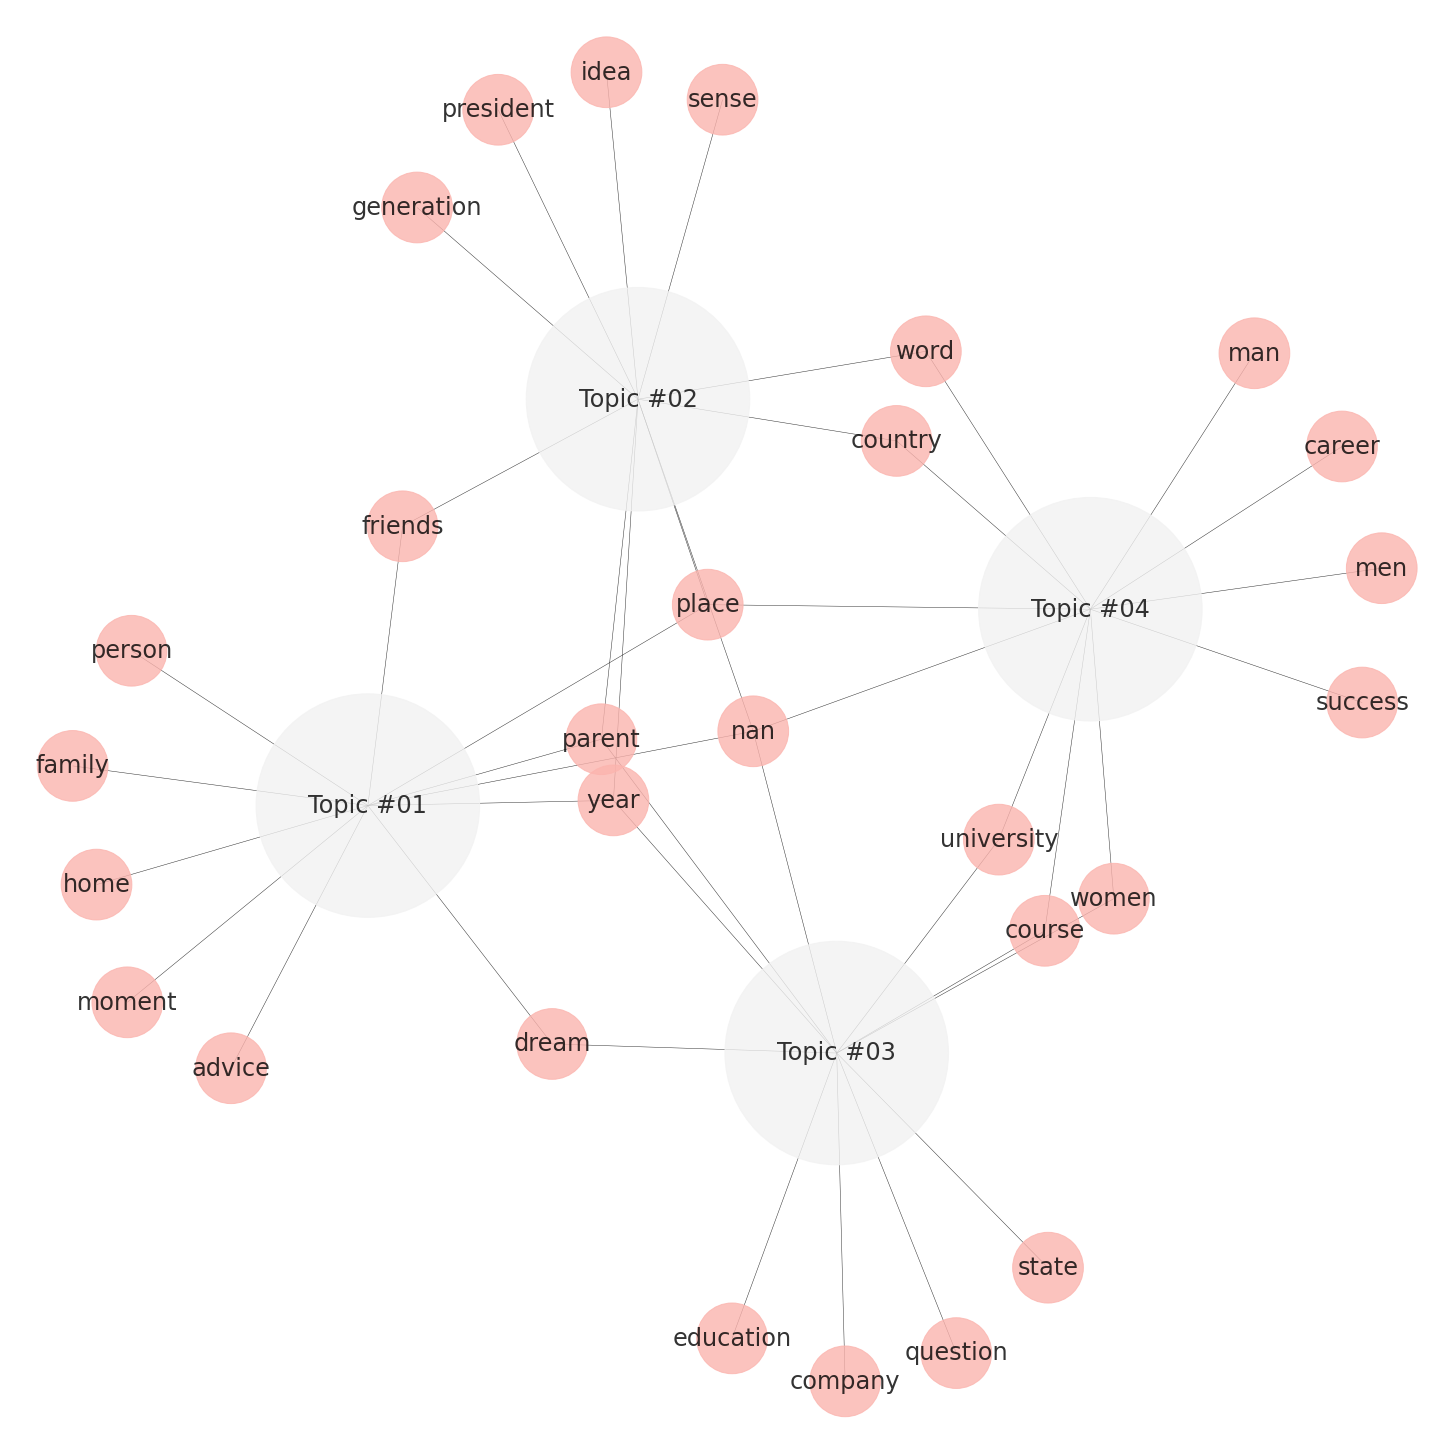

In [16]:
# Create networkx graph

G = nx.Graph()

# Create nodes and edges
for node in node_list:
    G.add_node(node)
for edge, weight in topic_word_assoc.items():
    if weight != 0:
        G.add_edge(edge[0], edge[1], weight=weight)
        
# Add attribute ('type') for node color
for n, d in list(G.nodes(data=True))[:4]:
    G.nodes[n]['type'] = 'topic'
for n, d in list(G.nodes(data=True))[4:]:
    G.nodes[n]['type'] = 'word'
    
# Assign values to 'type' (if want to use 'type' as node size partition)
types = ['topic','word']
mapping = {'topic':5, 'word':0.5}
nodes = G.nodes()
node_label = [mapping[G.nodes[n]['type']] for n in nodes]

# Draw
plt.rcParams['figure.figsize'] = [20, 20]
pos = nx.spring_layout(G, iterations=200, k=0.2, scale=0.5)             # position of nodes
nx.draw(G, pos, with_labels=True, font_size=24,                         # node label
        node_color=node_label, cmap='Pastel1',                          # node colorr
        nodelist = node_list, node_size=[v*10000 for v in node_label],  # mode size
        width=.5, alpha=0.8,                                            # edge width and transparency
        )

plt.show()

In [11]:
# # Create networkx graph
# # Can play around layout (but spring is still the best...)

# G = nx.Graph()

# # Create nodes and edges
# for node in node_list:
#     G.add_node(node)
# for edge, weight in topic_word_assoc.items():
#     if weight != 0:
#         G.add_edge(edge[0], edge[1], weight=weight)
        
# # Add attribute ('type') for node color
# for n, d in list(G.nodes(data=True))[:4]:
#     G.nodes[n]['type'] = 'topic'
# for n, d in list(G.nodes(data=True))[4:]:
#     G.nodes[n]['type'] = 'word'
    
# # Assign values to 'type' (if want to use 'type' as node size partition)
# types = ['topic','word']
# mapping = {'topic':5, 'word':0.5}
# nodes = G.nodes()
# node_label = [mapping[G.nodes[n]['type']] for n in nodes]

# # Draw
# plt.rcParams['figure.figsize'] = [20, 16]
# pos = nx.spring_layout(G, iterations=200, k=0.2, scale=0.5)             # position of nodes
# # pos = nx.bipartite_layout(G,nodes=node_list)
# # pos = nx.circular_layout(G)
# # pos = nx.kamada_kawai_layout(G)
# # pos = nx.random_layout(G)
# # pos = nx.spectral_layout(G)
# # pos = nx.spiral_layout(G)
# # pos = nx.nx_agraph.graphviz_layout(G, prog="dot")


# nx.draw(G, pos, with_labels=True, font_size=24,                         # node label
#         node_color=node_label, cmap='Pastel1',                          # node colorr
#         nodelist = node_list, node_size=[v*10000 for v in node_label],  # mode size
#         width=.5, alpha=0.8,                                            # edge width and transparency
#         )

# plt.show()

## 3. Curved edge style

In [17]:
# Memorize the node positions from basic plot
pos_want = pos

In [18]:
# Define function to create curved edge

def new_add_edge(G, a, b):
    if (a, b) in G.edges:
        max_rad = max(x[2]['rad'] for x in G.edges(data=True) if sorted(x[:2]) == sorted([a,b]))
    else:
        max_rad = 0
    G.add_edge(a, b, rad=max_rad+0.5)

### A. Node size depending on 'type' (topic / word)

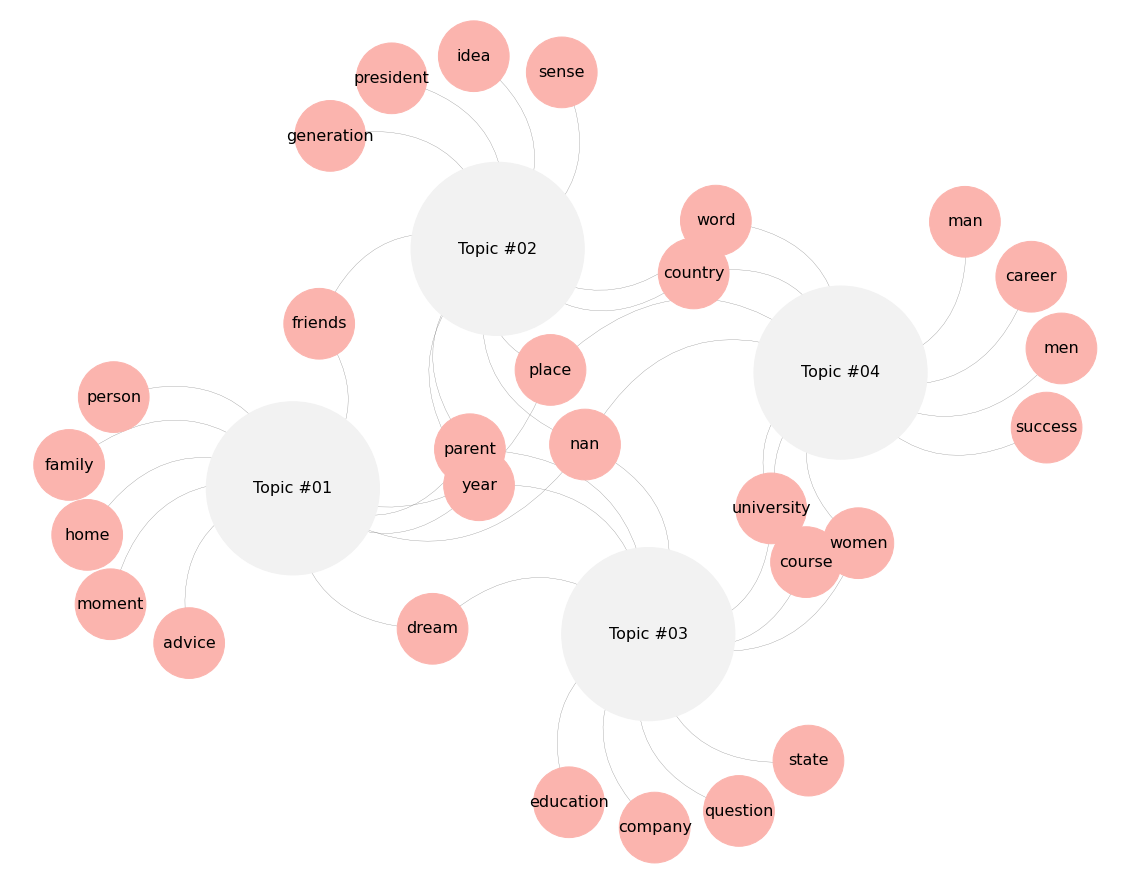

In [19]:
# Create graph
G = nx.MultiDiGraph()

# Add nodes
for node in node_list:
    G.add_node(node)
    
# Add edges
for edge, weight in topic_word_assoc.items():
    if weight != 0:
        new_add_edge(G,edge[0],edge[1])
        
# Add node attribute ('type')
for n, d in list(G.nodes(data=True))[:4]:
    G.nodes[n]['type'] = 'topic'
for n, d in list(G.nodes(data=True))[4:]:
    G.nodes[n]['type'] = 'word'
    
# Quantify node label for size and color
from itertools import count
types = ['topic','word']
mapping = {'topic':3, 'word':0.5}
nodes = G.nodes()
node_label = [mapping[G.nodes[n]['type']] for n in nodes]



# Draw
plt.rcParams['figure.figsize'] = [20, 16]
fig, ax = plt.subplots()

# Draw nodes and labels
nx.draw_networkx_nodes(G, pos=pos_want, node_color=node_label, cmap='Pastel1', # post_want was saved from default plot
        nodelist = node_list, node_size=[v*10000 for v in node_label],)
nx.draw_networkx_labels(G, pos=pos_want, font_size=16)

# Draw edges
for edge in G.edges(data=True):    
    nx.draw_networkx_edges(G, pos=pos_want,
                           edgelist=[(edge[0],edge[1])], connectionstyle=f'arc3, rad = {edge[2]["rad"]}',
                           width=.3,edge_color='grey',arrowsize=1)

ax.axis('off');

### B. Node size depending on degree
Topic nodes: largest  
Word nodes: bigger if shared by more topics


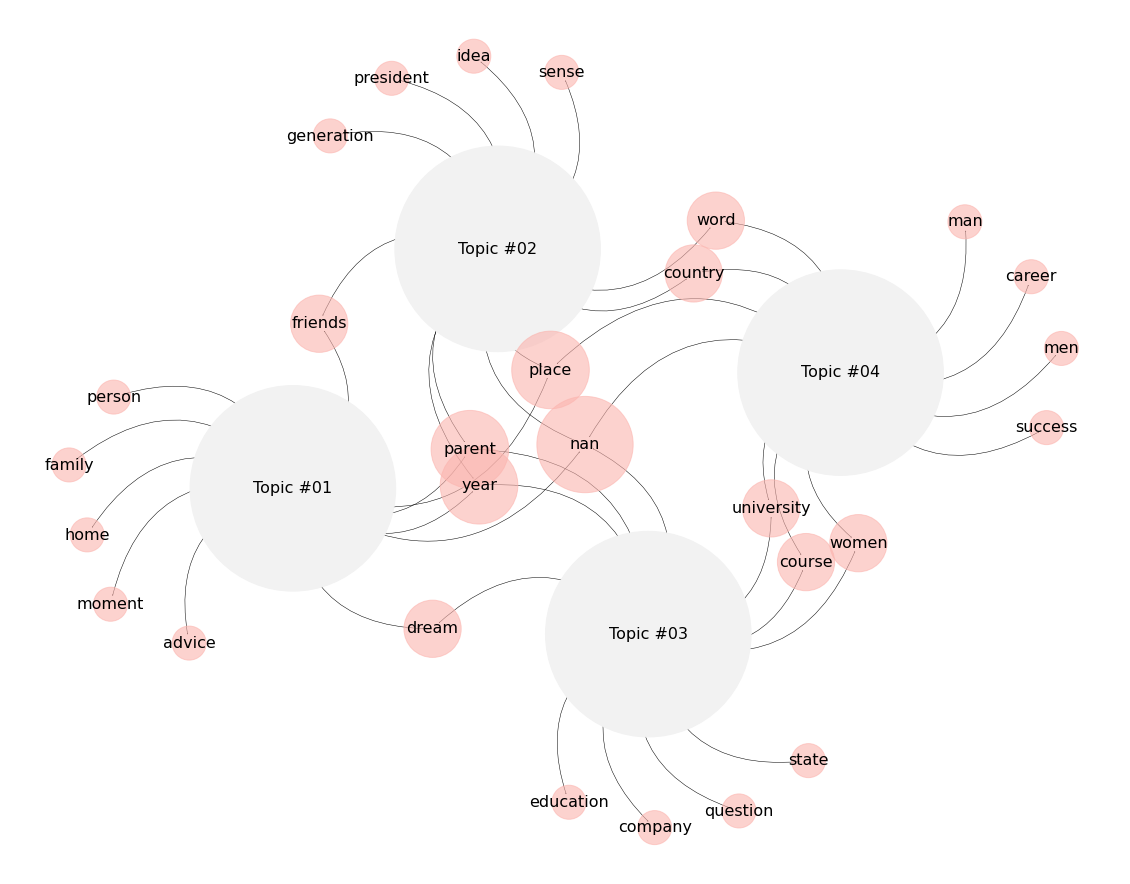

In [38]:
plt.rcParams['figure.figsize'] = [20, 16]

fig, ax = plt.subplots()

# nodes customization
degree_raw = list(nx.degree_centrality(G).values())
alpha_list = [1,1,1,1]+[0.6]*28

# nodes
degree = [d**1.5 for d in degree_raw]
nx.draw_networkx_nodes(G, pos=pos_want, # post_want was saved from default plot
                       node_color=node_label, cmap='Pastel1', alpha= alpha_list,
                       nodelist = node_list, node_size=[v*200000 for v in degree],)
# labels
nx.draw_networkx_labels(G, pos=pos_want, font_size=16)



# edges
for edge in G.edges(data=True):    
    nx.draw_networkx_edges(G, pos=pos_want,
                           edgelist=[(edge[0],edge[1])], connectionstyle=f'arc3, rad = {edge[2]["rad"]}',
                           width=.5,edge_color='k',arrowsize=1)

ax.axis('off');